# ASSIGNMENT 4
Name: Mohammad Irfan Iskandar Bin Zainuddin (A18CS0111)

# Task 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#(a) Load Sales Data.csv, assign it into varibale named sales. Display the first 10 rows of the sales
sales=pd.read_csv('Sales Data.csv')
sales.head(10)

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


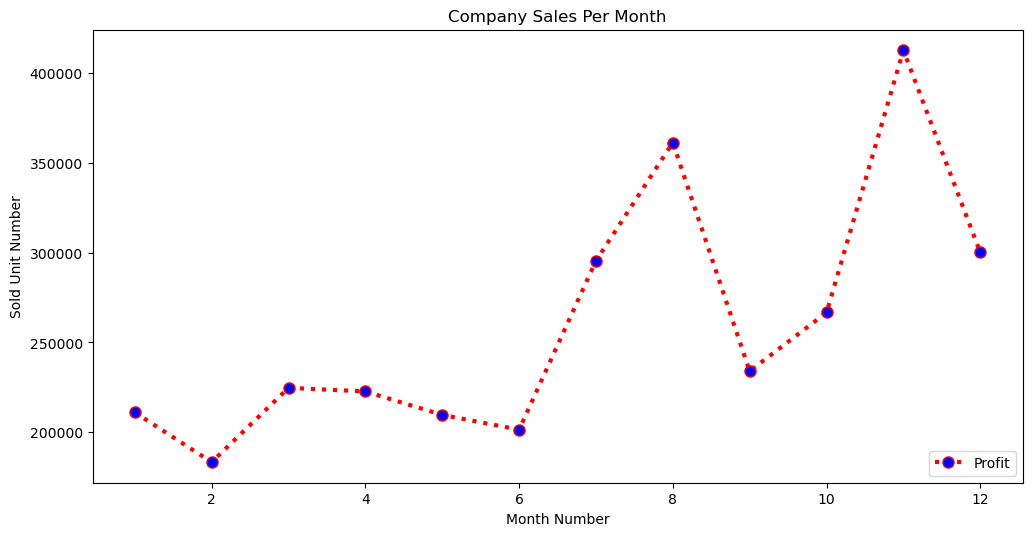

In [3]:
#(b) Get total profit of all moths and show line plot wiuth the following style properties
plt.subplots(figsize=(12,6),dpi=100)

#line style=dotted,line color=red,line width=3,circle marker(size=8,color=blue)
plt.plot(sales['month_number'],sales['total_profit'],ls=':',color='red',lw=3,marker='o',markersize=8,markerfacecolor='blue',label='Profit')

#show legend at the lower right location
plt.legend(loc=4)

#Xlabel and Y label
plt.xlabel('Month Number')
plt.ylabel('Sold Unit Number')

#Title=Company Sales Per Month
plt.title('Company Sales Per Month')
plt.show()

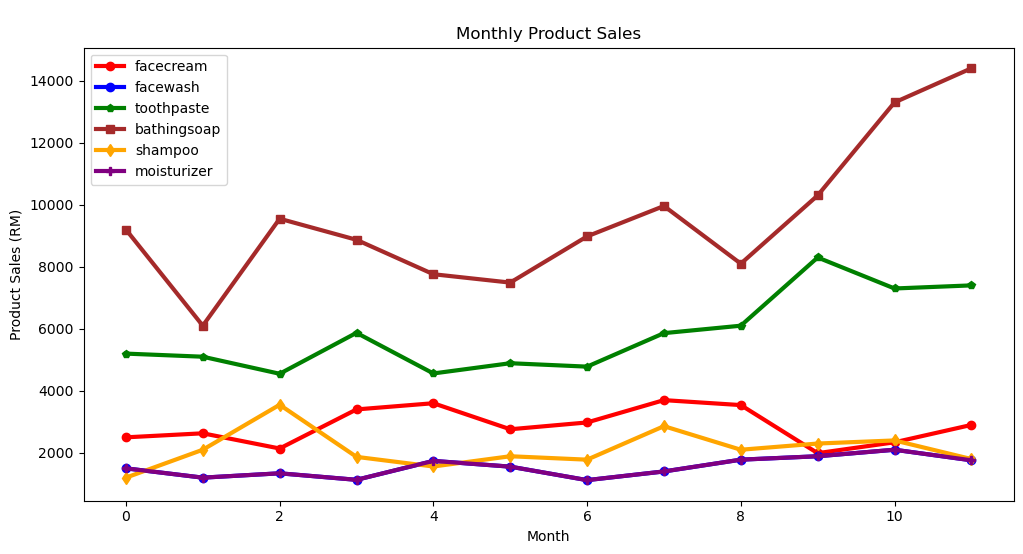

In [4]:
#(c) Read data from sales Data.csv and show all product sales using a multiline plot,sized
#1200X600 pixels. Differentiate all the lines by line color and marker

fig,axes=plt.subplots(figsize=(12,6),dpi=100)
axes.plot(sales['facecream'],lw=3,color='red',marker='o',label='facecream')
axes.plot(sales['facewash'],lw=3,color='blue',marker='o',label='facewash')
axes.plot(sales['toothpaste'],lw=3,color='green',marker='p',label='toothpaste')
axes.plot(sales['bathingsoap'],lw=3,color='brown',marker='s',label='bathingsoap')
axes.plot(sales['shampoo'],lw=3,color='orange',marker='d',label='shampoo')
axes.plot(sales['moisturizer'],lw=3,color='purple',marker='P',label='moisturizer')
axes.set_xlabel('Month')
axes.set_ylabel('Product Sales (RM)')
axes.legend()
axes.set_title("\nMonthly Product Sales");

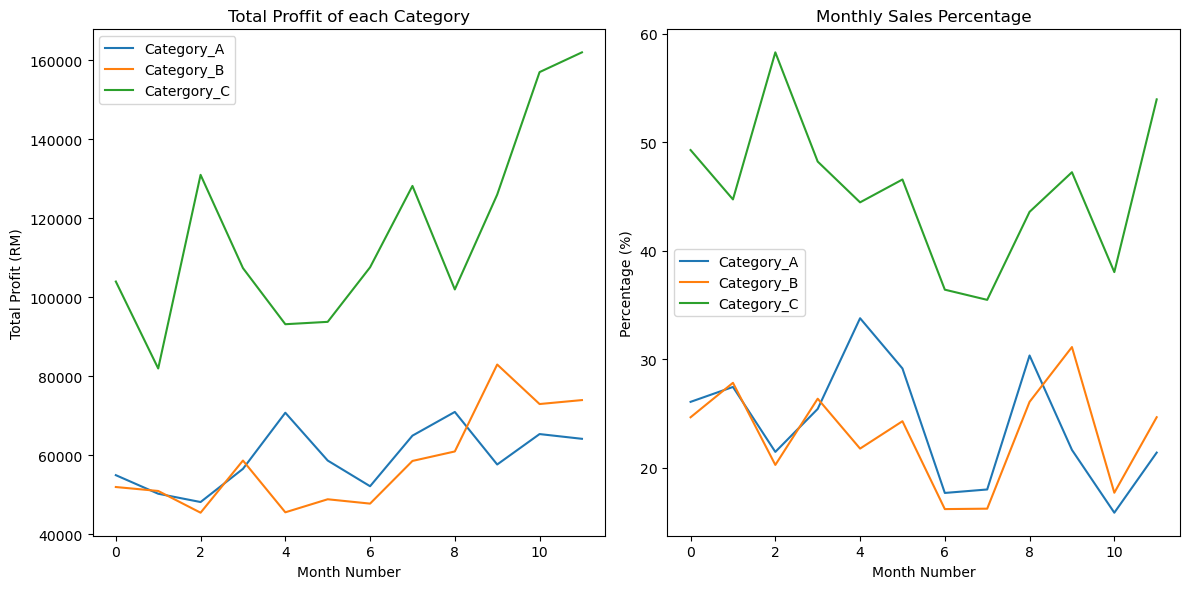

In [5]:
#(d) The products in the sales data can be further grouped as follow:
  #a) Category A: facecream,facewash,moisturizer
  #b) Category B: toothpase
  #c) Category C: bathingsoap,shampoo
Category_A=(sales['facecream']+sales['facewash']+sales['moisturizer'])*10
Category_B=(sales['toothpaste'])*10
Category_C=(sales['bathingsoap']+sales['shampoo'])*10

#Group the data accordingly and obtain the following information, then plot into two subplots
#1) total profit of each category for every month
fig,axes=plt.subplots(1,2,figsize=(12,6),dpi=100)
axes[0].plot(Category_A,label='Category_A')
axes[0].plot(Category_B,label='Category_B')
axes[0].plot(Category_C,label='Catergory_C')
axes[0].set_xlabel('Month Number')
axes[0].set_ylabel('Total Profit (RM)')
axes[0].set_title('Total Proffit of each Category')
axes[0].legend()
fig.tight_layout()

#2) percentage of each category for every month over the grand total proftit of all categories
#fig,axes=plt.subplots(nrows=1,ncols=2)
axes[1].plot(((Category_A/sales['total_profit'])*100),label='Category_A')
axes[1].plot(((Category_B/sales['total_profit'])*100),label='Category_B')
axes[1].plot(((Category_C/sales['total_profit'])*100),label='Category_C')
axes[1].set_title('Monthly Sales Percentage')
axes[1].set_xlabel('Month Number')
axes[1].set_ylabel('Percentage (%)')
axes[1].legend()
fig.tight_layout()

# TASK 2

In [9]:
#1.Read the datasets given below and save the data into different DataFrame
Customer=pd.read_csv('customer.csv')
Products=pd.read_csv('products.csv')
Sales=pd.read_csv('sales.csv')

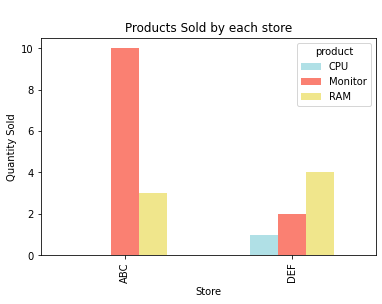

In [7]:
#2. From the above datasets, produce a chart (any appropriate chart) for each below:

#a. products sold by each store
color=['powderblue','salmon','khaki']
grouped=Sales['qty'].groupby([Sales['store'],Sales['product']]).sum().unstack()
grouped.plot(kind='bar',color=color)
plt.title('\nProducts Sold by each store');
plt.xlabel('Store')
plt.ylabel('Quantity Sold');

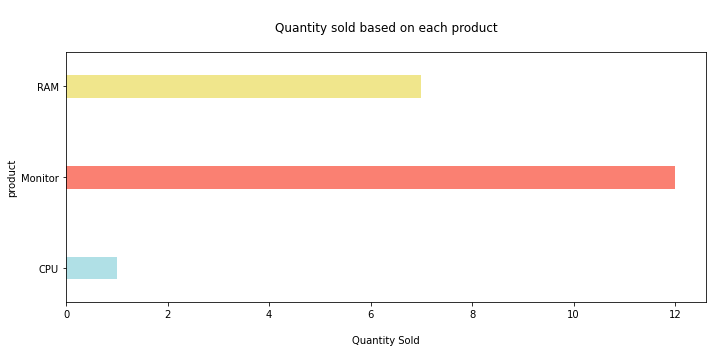

In [8]:
#b quantity sold against each product
grouped_1=Sales['qty'].groupby(Sales['product']).sum()
#grouped_1
fig,axes=plt.subplots(figsize=(10,5))
plt.xlabel('\nQuantity Sold')
plt.title('\nQuantity sold based on each product\n')
grouped_1.plot.barh(width=0.25,color=color)
plt.tight_layout()

In [ ]:
#c totalsales against each product
mergeFrame=pd.merge(Sales,Products,on=['p_id','product'], how='left')
mergeFrame

In [ ]:
mergeFrame['total']=mergeFrame['qty']*mergeFrame['price']
mergeFrame=mergeFrame['total'].groupby(mergeFrame['product']).sum()
mergeFrame

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(12,6),dpi=100)
grouped_1.plot.barh(ax=axes[0],color=color)
axes[0].set_title('\nQuantity sold based on each product\n')
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Product')
mergeFrame.plot.barh(ax=axes[1],color=color)
axes[1].set_title('\n\n\nSales on bassed on each product\n')
axes[1].set_xlabel('Sales (RM)')
axes[1].set_ylabel('Product')
fig.tight_layout();

In [10]:
3.# From the above datasets, produce an output for each below:

#a quantity sold against each product against each store
result=pd.DataFrame(Sales['qty'].groupby([Sales['store'],Sales['product']]).sum())
print('Quantity sold against each product for every store')
print('='*50)
result

Quantity sold against each product for every store


qty
store product     
ABC   Monitor   10
      RAM        3
DEF   CPU        1
      Monitor    2
      RAM        4

In [11]:
#b quantity sold against each store with the total turnover
storeInfo=pd.merge(Sales,Products,on=['p_id','product'],how='left')
storeInfo['total']=storeInfo['qty']*storeInfo['price']
storeInfo=storeInfo.groupby(['store'])[['qty','total']].sum()

print('Quantity sold against each store with total turnover of the store')
print('='*65)
storeInfo

Quantity sold against each store with total turnover of the store


,qty,total
store,,
ABC,13,1020
DEF,7,565


In [12]:
#c. Products which are not sold
unsoldProd=pd.merge(Sales,Products, on=['p_id'], how='outer')
unsoldProd

,sale_id,c_id,p_id,product_x,qty,store,product_y,price
0,1.0,2.0,3,Monitor,2.0,ABC,Monitor,75
1,3.0,1.0,3,Monitor,3.0,ABC,Monitor,75
2,5.0,2.0,3,Monitor,3.0,ABC,Monitor,75
3,6.0,3.0,3,Monitor,2.0,DEF,Monitor,75
4,9.0,2.0,3,Monitor,2.0,ABC,Monitor,75
5,2.0,2.0,4,CPU,1.0,DEF,CPU,55
6,4.0,4.0,2,RAM,2.0,DEF,RAM,90
7,7.0,2.0,2,RAM,3.0,ABC,RAM,90
8,8.0,3.0,2,RAM,2.0,DEF,RAM,90
9,NaN,NaN,1,NaN,NaN,NaN,Hard Disk,80


In [13]:
unsoldProd=unsoldProd.loc[unsoldProd['c_id'].isnull(),:]
unsoldProd

,sale_id,c_id,p_id,product_x,qty,store,product_y,price
9,NaN,NaN,1,NaN,NaN,NaN,Hard Disk,80
10,NaN,NaN,5,NaN,NaN,NaN,Keyboard,20
11,NaN,NaN,6,NaN,NaN,NaN,Mouse,10
12,NaN,NaN,7,NaN,NaN,NaN,Motherboard,50
13,NaN,NaN,8,NaN,NaN,NaN,Power supply,20


In [14]:
print('Products which are not sold')
print('='*25)
unsoldProd.loc[:,['p_id','product_y','price']]

Products which are not sold


,p_id,product_y,price
9,1,Hard Disk,80
10,5,Keyboard,20
11,6,Mouse,10
12,7,Motherboard,50
13,8,Power supply,20


In [ ]:
#d Customers who have not purchased any product
customers=pd.merge(Sales,Customer,on='c_id',how='outer')
customers

In [ ]:
customers=customers.loc[customers['p_id'].isnull()]
customers

In [ ]:
print("Customers that did not make any purchase")
print('='*40)
customers.loc[:,['c_id','Customer']]